# Tarea 6. Integración numérica e interpolación

In [207]:
Pkg.add("PyPlot")
Pkg.add("SymPy")
Pkg.add("Plots")

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Package Plots is already installed
INFO: METADATA is out-of-date — you may not have the latest version of Plots
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [273]:
using SymPy;
using PyPlot;
plt = PyPlot;
using Plots
plot = Plots;

## Ejercicio 1. Método del rectángulo

In [343]:
function rectangulo(f, a, b, n)
    S=0      #S será el valor que vaya sumando en las iteraciones
    A = linspace.(a,b,n)      # Defino la partición del intervalo X
    for j in 1:n-1            #Comienza la iteración de la suma con el método del rectángulo
        S = S + (A[j+1]-A[j])*f((A[j+1]+A[j])/2)
    end   
    S    
end    

rectangulo (generic function with 1 method)

In [332]:
rectangulo(x->x^2,0,1,100)

0.33332483079957825

## Ejercicio 2. Método del trapecio

In [344]:
function trapecio(f, a, b, n)
    S=0
    A = linspace.(a,b,n)
    for j in 1:n-1
        S = S + (A[j+1]-A[j])*(f(A[j+1])+f(A[j]))/2  #Comienza la iteración de la suma con el método del trapecio
    end   
    S    
end

trapecio (generic function with 1 method)

In [14]:
trapecio(x->x^2,0,1,100)

0.33335033840084344

## Ejercicio 3. Método de Simpson 

In [345]:
function simpson(f, a, b, n)
    S=0
    A = linspace.(a,b,n)
    for j in 1:n-1
        p = (A[j+1] + A[j])/2
        S = S + (A[j+1]-A[j])/6 * (f(A[j]) + 4f(p) + f(A[j+1]))      #Comienza la iteración de la suma con el método de simpson
    end   
    S    
end

simpson (generic function with 1 method)

In [17]:
simpson(x->x^2,0,1,100)

0.33333333333333337

## Ejercicio 4. Interpolación de Lagrange

In [20]:
function base(Arx)       #Defino la función base que nos dará las bases polinomiales
    x = symbols("x")     #definir x como símbolo nos dará posibilidad de tomarla como función
    d = length(Arx)      
    K = []
    P = 1                #Este es el contador de la multiplicación
    for i in 1:d         #ciclo para cada entrada de Arx
        P = 1            #Regreso P=1 para volver a contar de nuevo
        for j in 1:d     #Nuevo ciclo para la doble multiplicación
            if j != i    #Si se cumple la condición para no dividir entre cero
                P = P*(x-Arx[j])/(Arx[i]-Arx[j])      #Definición de base polinomial
            end
        end
        push!(K,P)       #Agregar a K el P final de cada i
    end
    K
end

base (generic function with 1 method)

In [290]:
x = symbols("x")
function interpolacion(Arx, Ary, x0)
    d = length(Arx)
    L = 0
    K = base(Arx)
    P = 1
    for i in 1:d              #la suma que es combinación lineal
        L = L + Ary[i]*K[i]   #Definición para obtener L
    end
    #println(convert(AbstractFloat,L(x0)))     #Para transformar L(x0) a flotante
    expand(L(x0))             #Para desarrollar el polinomio
end

interpolacion (generic function with 2 methods)

In [308]:
Arx=[1,2,3,4,5,6,7,8,9]
Ary=[1,4,9,16,25,36,49,64,81]    #Este arreglo es el cuadrado de Arx
println(interpolacion(Arx,Ary,2))  #La interpolación evaluada en 2
interpolacion(Arx,Ary,x)            #El resultado simbólico de la interpolación

4


 2
x 

7.42678488152571e-18*x^9 - 1.97979336359812e-5*x^8 + 0.000497576342935013*x^7 - 0.00411366974808214*x^6 + 0.00878850466172487*x^5 + 0.0243778891541915*x^4 + 0.0201425548285172*x^3 - 0.512543349763863*x^2 + 0.00313254720749789*x + 1.0



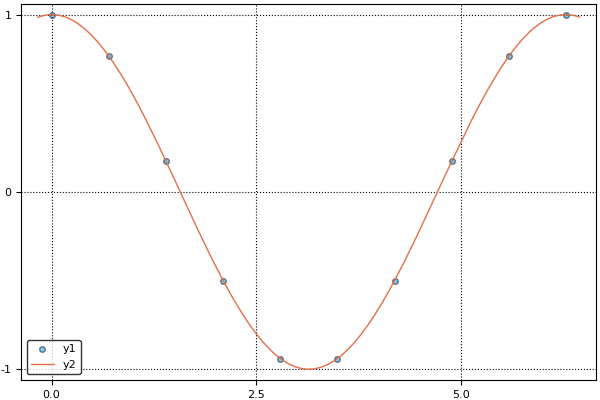

In [304]:
Arx = linspace(0,2*pi,10)
Ary= cos.(Arx)
println(interpolacion(Arx,Ary,x))
plot.scatter(Arx,Ary,alpha=0.5)
plot.plot!(interpolacion(Arx,Ary,x))

-2.60208521396521e-18*x^9 + 0.00125598518133158*x^8 - 0.0315663505495105*x^7 + 0.313492883032332*x^6 - 1.5475381373856*x^5 + 3.89900431361716*x^4 - 4.56959608798482*x^3 + 2.02232704563065*x^2 - 0.784017877200959*x + 1.0



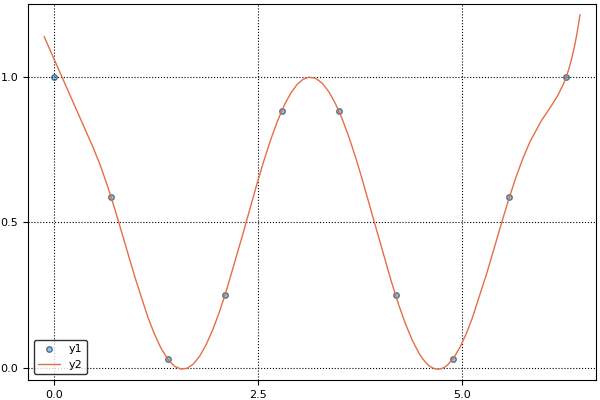

In [303]:
Arx = linspace(0,2*pi,10)
Ary=[]
m=length(Arx)
for i in 1:m
    push!(Ary,cos(Arx[i])^2)
end
println(interpolacion(Arx,Ary,x))
plot.scatter(Arx,Ary,alpha=0.5)
plot.plot!(interpolacion(Arx,Ary,x))

-173*x^6/2520 + 113*x^5/84 - 4957*x^4/504 + 2731*x^3/84 - 54571*x^2/1260 + 83*x/14 + 10



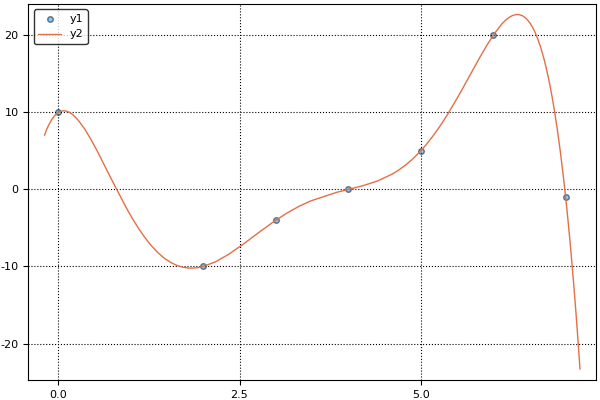

In [302]:
Arx = [0,2,3,4,5,6,7]
Ary = [10,-10,-4,0,5,20,-1]
println(interpolacion(Arx,Ary,x))
plot.scatter(Arx,Ary,alpha=0.5)
plot.plot!(interpolacion(Arx,Ary))

## Ejercicio 5. Convergencia en métodos de integración

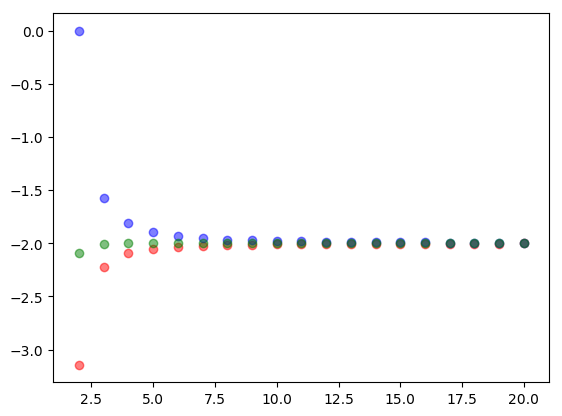

PyObject <matplotlib.collections.PathCollection object at 0x145069e90>

In [408]:
R=[]
T=[]
S=[]
N = 2:20
a=0
b=pi
for i in N
    push!(R,rectangulo(z->-sin(z),a,b,i))
    push!(T,trapecio(z->-sin(z),a,b,i))
    push!(S,simpson(z->-sin(z),a,b,i))
end
#N = N/(b-a)
plt.scatter(N,R,alpha=0.5, color="red")
plt.scatter(N,T,alpha=0.5, color="blue")
plt.scatter(N,S,alpha=0.5, color="green")

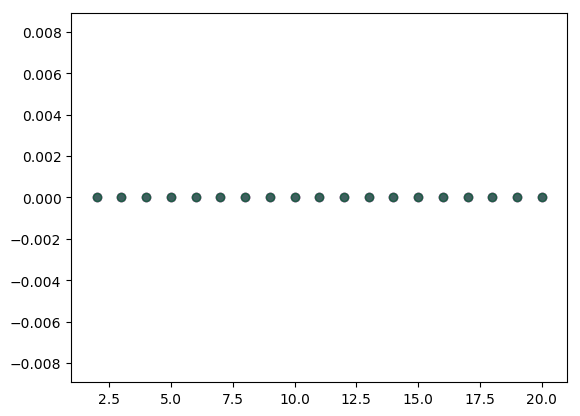

PyObject <matplotlib.collections.PathCollection object at 0x144ea8d10>

In [407]:
R=[]
T=[]
S=[]
N = 2:20
a=0
b=2*pi
for i in N
    push!(R,rectangulo(z->-sin(z),a,b,i))
    push!(T,trapecio(z->-sin(z),a,b,i))
    push!(S,simpson(z->-sin(z),a,b,i))
end
#N = N/(b-a)
plt.scatter(N,R,alpha=0.5, color="red")
plt.scatter(N,T,alpha=0.5, color="blue")
plt.scatter(N,S,alpha=0.5, color="green")

En la gráfica de arriba se observa que todos los puntos están sobrepuestos. Esto significa que todos los métodos convergieron a cero de la misma manera, para todas las longitudes de partición. Esto no sucede en la gráfica anterior, en la que el intervalo total es el $[0,\pi]$. Esto puede deberse a que los métodos utilizados son más precisos cuando el valor de la integral es pequeño.